In [3]:
# set up dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [4]:
# Load file
file_path = Path("instructions/crypto_data.csv")
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


## Preprocessing

In [5]:
# filter for the cryptos that are not being traded
df = df.drop(df[df.IsTrading == False].index)

# drop the column IsTrading
df = df.drop('IsTrading', axis=1)

# drop all cryptos that have at least one null value
df = df.dropna()

# drop all cryptos where TotalCoinsMined < 1
df = df.drop(df[df.TotalCoinsMined < 1].index)

# drop the CoinName column (isn't needed)
df = df.drop('CoinName', axis=1)

# rename the first column to identify it 
df = df.rename(columns={'Unnamed: 0' : 'CoinAbbrev'})
df

,CoinAbbrev,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [6]:
# convert Algorithm and ProofType into numerical data to be able to be comprehensible for ML
crypto_df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
crypto_df

,CoinAbbrev,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# save the CoinAbbrev column 
crypto_names = pd.DataFrame(crypto_df['CoinAbbrev'])
crypto_names

,CoinAbbrev
0,42
2,404
5,1337
7,BTC
8,ETH
...,...
1238,ZEPH
1242,GAP
1245,BDX
1246,ZEN


In [8]:
# drop the CoinAbbrev column from the dataframe
crypto_df = crypto_df.drop('CoinAbbrev', axis=1)
crypto_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# scale the data
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(crypto_df)

## Dimensional Reduction

PCA

In [12]:
# apply PCA to preserve 90% of the explained variance
# initialize PCA model
pca = PCA(n_components=0.90)

# get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)

In [13]:
# transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-8.512033e-12,4.249852e-14,-1.900208e-14,-0.007129,-1.319756,-0.051813,...,4.389265e-15,-3.714788e-15,-1.765906e-15,1.619122e-15,5.593115e-15,9.974757e-16,-1.429622e-15,3.954725e-16,-2.405036e-15,-5.391792e-16
1,-0.318434,1.032331,-0.591126,0.001386,-8.442013e-12,4.270357e-14,-1.900306e-14,-0.007739,-1.322514,-0.056674,...,4.575069e-15,-4.139823e-15,-2.090471e-15,1.523101e-15,5.393130e-15,1.059345e-15,-1.448294e-15,-2.345078e-17,-2.847953e-15,-2.939550e-16
2,2.305468,1.656383,-0.683617,0.004731,-2.889987e-11,6.017970e-14,-3.157021e-14,-0.054781,-1.542879,-0.943951,...,-6.159182e-14,-1.365411e-14,-9.619408e-15,-1.319248e-13,-7.697517e-14,1.766499e-14,6.890024e-14,-1.066758e-13,5.975039e-14,6.791535e-15
3,-0.145184,-1.320593,0.192813,-0.001229,7.505110e-12,-1.489288e-14,7.615252e-15,-0.002071,0.281463,0.251862,...,-2.163773e-14,8.909417e-15,-4.222706e-15,-2.279555e-14,2.055742e-14,-2.627622e-15,-8.677800e-15,-1.884512e-14,2.146230e-14,4.637397e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.040303e-11,-2.983942e-14,1.595009e-14,0.027735,0.519099,0.188820,...,-2.247827e-13,1.887870e-13,2.439029e-14,-1.026407e-13,2.513258e-13,9.234929e-15,-9.972093e-14,3.496371e-14,1.654675e-13,2.158582e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,5.043466e-11,1.312135e-14,-2.785646e-14,-0.851713,2.041159,3.560713,...,-2.203817e-14,9.761029e-15,-2.252741e-15,-2.410092e-14,2.102008e-14,-4.720389e-16,-1.392129e-14,-1.869614e-14,2.662300e-14,5.009708e-15
528,-0.333144,1.032071,-0.590740,0.001399,-8.526061e-12,4.271284e-14,-1.904351e-14,-0.007154,-1.320125,-0.052460,...,4.171516e-15,-3.694684e-15,-1.655175e-15,1.507465e-15,5.883483e-15,1.087474e-15,-1.420697e-15,4.261598e-16,-2.759646e-15,-5.914956e-16
529,0.324349,-2.312308,0.421515,-0.001319,8.040807e-12,-2.897983e-14,1.559461e-14,0.017309,0.161077,-0.047787,...,-1.984209e-14,4.559210e-14,2.180657e-15,-2.951647e-14,1.010501e-13,-2.579967e-14,-7.876263e-14,2.109426e-16,9.013544e-14,2.021938e-14
530,-0.149364,-2.049336,0.412968,-0.001745,1.064434e-11,-3.051441e-14,1.624331e-14,0.028954,0.544389,0.233373,...,-3.826182e-16,-5.061984e-15,6.302618e-16,-4.199142e-16,-1.204399e-15,3.698711e-15,-4.716647e-15,-5.984165e-15,3.486398e-15,-3.877118e-15


Observation: Using PCA to reduce the dimensionality to 90% of the explained variance reduced the number of features from 98 to 74. That imeans 74 features (of the original 98) account for 90% of the explained variance of the crypto_scaled data.

# t-SNE

In [14]:
# further reduce the dataset dimensions with t-SNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=250)

# reduce dimensions
tsne_features = tsne.fit_transform(df_crypto_pca)

# check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

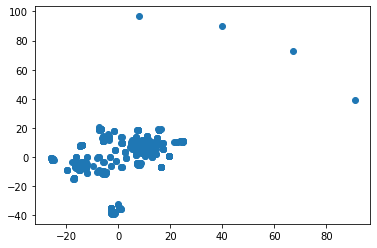

In [15]:
# Create scatteer plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Cluster analysis with k-Means

In [17]:
# find the best value for k
inertia = []
k = list(range(1, 11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\lique\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44654.886615
3,4,43776.274209
4,5,43053.126283
5,6,42040.369865
6,7,41311.621153
7,8,40246.805368
8,9,39529.308859
9,10,38627.609281


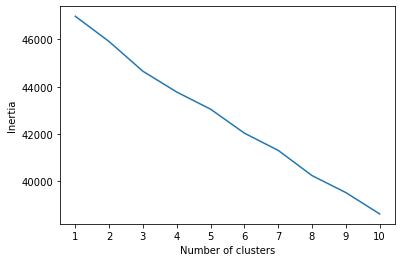

In [18]:
# plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Observation: No elbow identified.  There could be a problem with how the data was pre-processed, or it needs a different algorithm?